<a href="https://colab.research.google.com/github/WilmarAriza/WilmarAriza/blob/main/PCA_Contribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

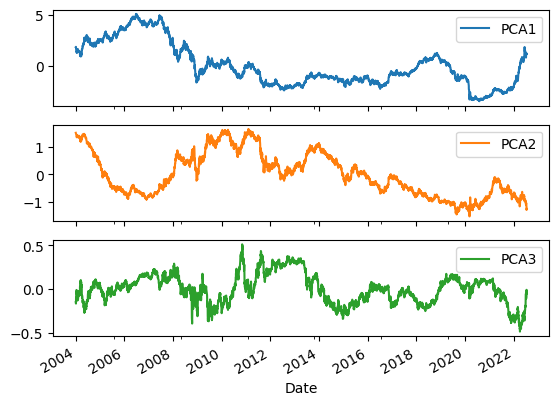

<Figure size 1000x500 with 0 Axes>

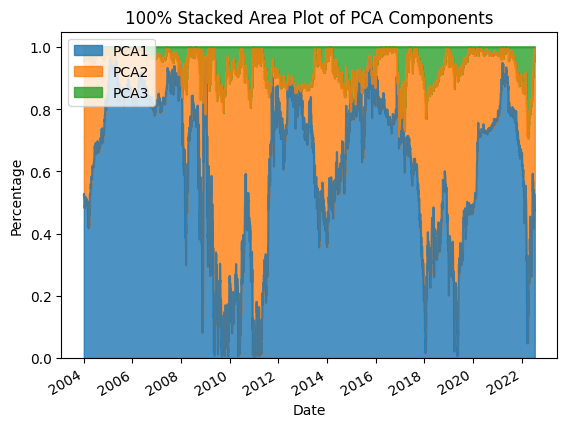

In [10]:
!pip install quandl -q

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
import matplotlib.pyplot as plt
import quandl

# Set your Quandl API key
quandl.ApiConfig.api_key = '3EJLHe95YFKGAxUmUtz4'

# Define the FRED codes for the yield curve data you want
fred_codes = ['DGS30', 'DGS10', 'DGS5', 'DGS2', 'DGS1']

# Use Quandl to download the data
df = pd.DataFrame()
for code in fred_codes:
    data = quandl.get('FRED/' + code, trim_start='2004-01-01')
    df = pd.concat([df, data], axis=1)
df.columns = fred_codes

# Calculate the percentage changes
# df_pct_change = df.pct_change().dropna()

#Step1: We calculate the mean of the scaled data.
df_normalized_mean = pd.DataFrame(scale(df))

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_normalized_mean)

# Create a new DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, index=df.index, columns=['PCA1', 'PCA2', 'PCA3'])

# Plot the results
pca_df.plot(subplots=True, layout=(3,1))
plt.show()

# Normalize the data so that each row sums to 1
pca_df_abs = pca_df.abs()
pca_df_norm = pca_df_abs.div(pca_df_abs.sum(axis=1), axis=0)

# Create the 100% stacked area plot
plt.figure(figsize=(10,5))
pca_df_norm.plot.area(stacked=True, alpha=0.8)

# Add labels and title
plt.ylabel('Percentage')
plt.title('100% Stacked Area Plot of PCA Components')
plt.legend(loc='upper left')

# Show the plot
plt.show()

